<a href="https://colab.research.google.com/github/rebeccasoren/COVID19_Analysis/blob/master/covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the modules

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the datasets

In [11]:
!wget https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/time_series_covid19_confirmed_global.csv
!wget https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/WHR20.csv

--2020-10-31 08:23:57--  https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150542 (147K) [text/plain]
Saving to: ‘covid19_confirmed_global.csv’

covid19_confirmed_g 100%[===================>] 147.01K  --.-KB/s    in 0.02s   

2020-10-31 08:23:57 (6.75 MB/s) - ‘covid19_confirmed_global.csv’ saved [150542/150542]

--2020-10-31 08:23:57--  https://raw.githubusercontent.com/rebeccasoren/COVID19_Analysis/master/Datasets/WHR20.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent

In [12]:
covid_dataset=pd.read_csv('time_series_covid19_confirmed_global.csv')
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558


In [13]:
happiness_report=pd.read_csv('WHR20.csv')
happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


## Reformat Covid 19 Dataset
Delete useless columns and aggregate rows by country

In [14]:
covid_dataset.drop(["Lat", "Long"], axis=1, inplace=True)
covid_dataset_aggregated=covid_dataset.groupby("Country/Region").sum()
covid_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145,41268,41334
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040,20315,20634
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026,57332,57651
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517,4567,4665
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074,10269,10558


## Reformat Happiness Report
Delete useless columns and set index to country. 

In [15]:
#select needed columns for analysis
useless_cols=['Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'Generosity', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']
happiness_report.drop(useless_cols, axis=1, inplace=True)
happiness_report.set_index("Country name", inplace=True)
happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Country name,,,,,,
Finland,10.639267,0.954330,71.900825,0.949172,0.195445,1.972317
Denmark,10.774001,0.955991,72.402504,0.951444,0.168489,1.972317
Switzerland,10.979933,0.942847,74.102448,0.921337,0.303728,1.972317
Iceland,10.772559,0.974670,73.000000,0.948892,0.711710,1.972317
Norway,11.087804,0.952487,73.200783,0.955750,0.263218,1.972317


## Visualising Aggregated Data 
Plot of spread of corona virus in 10 most infected countries in the world

Date: 10/29/20
List of 10 most infected countries: ['US', 'India', 'Brazil', 'Russia', 'France', 'Spain', 'Argentina', 'Colombia', 'United Kingdom', 'Mexico']


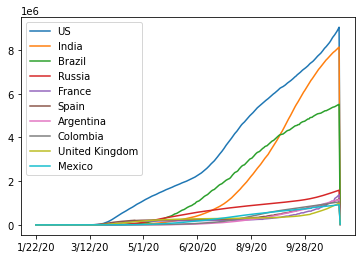

In [26]:
from datetime import timedelta 
from datetime import date 
today = date.today()  
yesterday = today - timedelta(days = 2) 
date=yesterday.strftime("%-m/%d/%y")
print("Date:",date)
countries=list(covid_dataset_aggregated.nlargest(10, [date]).index.values)
print("List of 10 most infected countries:",countries)
for c in countries:
  covid_dataset_aggregated.loc[c].plot()
plt.legend()

## Finding max infection rate for all countries


In [27]:
countries=list(covid_dataset_aggregated.index)
max_infection_rate=[]
for c in countries:
    max_infection_rate.append(covid_dataset_aggregated.loc[c].diff().max())
covid_dataset_aggregated["Max Infection Rate"]=max_infection_rate
covid_data=pd.DataFrame(covid_dataset_aggregated["Max Infection Rate"])
# Create new dataframe with only needed columns.
covid_data=pd.DataFrame(covid_dataset_aggregated["Max Infection Rate"])
covid_data.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,319.0
Algeria,675.0
Andorra,299.0
Angola,355.0


## Joining datasets

In [28]:
data=covid_data.join(happiness_report, how="inner")
data.head()

,Max Infection Rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Afghanistan,915.0,7.462861,0.470367,52.590000,0.396573,0.933687,1.972317
Albania,319.0,9.417931,0.671070,68.708138,0.781994,0.896304,1.972317
Algeria,675.0,9.537965,0.803385,65.905174,0.466611,0.735485,1.972317
Argentina,18326.0,9.810955,0.900568,68.803802,0.831132,0.842010,1.972317
Armenia,2474.0,9.100476,0.757479,66.750656,0.712018,0.773545,1.972317


## Creating Correlation Matrix

In [29]:
data.corr().round(7)

,Max Infection Rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Ladder score in Dystopia
Max Infection Rate,1.000000,0.207095,0.132849,0.221140,0.093854,-0.036602,0.0
Logged GDP per capita,0.207095,1.000000,0.788877,0.858725,0.440761,-0.338651,-0.0
Social support,0.132849,0.788877,1.000000,0.764977,0.486838,-0.224509,-0.0
Healthy life expectancy,0.221140,0.858725,0.764977,1.000000,0.478732,-0.361469,0.0
Freedom to make life choices,0.093854,0.440761,0.486838,0.478732,1.000000,-0.428907,-0.0
Perceptions of corruption,-0.036602,-0.338651,-0.224509,-0.361469,-0.428907,1.000000,0.0
Ladder score in Dystopia,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,1.0


**Observations:**

1. There is **negative correlation** between Max 
Infection Rate and Ladder score in Dystopia.
2. There is a **positive correlation** between Max Infection Rate and the following attributes:
 Logged GDP per capita, Social Support, Healthy Life expectancy, Freedom to make life choices, Perceptions of corruption






## Visualization of Results
Plots for attributes with positive correlation with Max Infection Rate.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


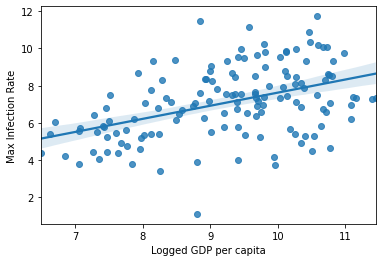

In [30]:
x=data["Logged GDP per capita"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


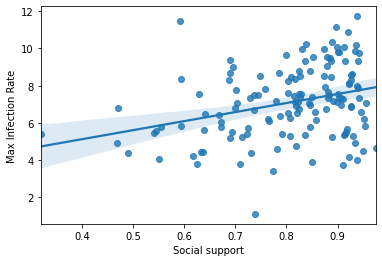

In [31]:
x=data["Social support"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


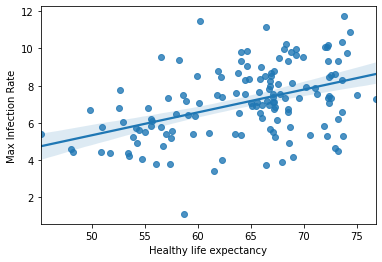

In [32]:
x=data["Healthy life expectancy"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


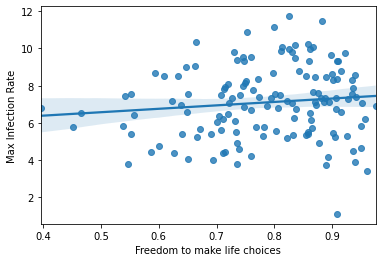

In [33]:
x=data["Freedom to make life choices"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


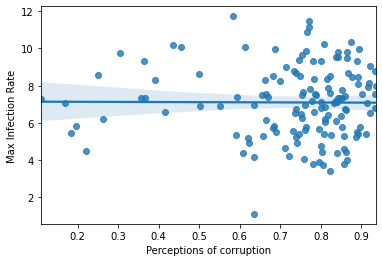

In [34]:
x=data["Perceptions of corruption"]
y=data["Max Infection Rate"]
sns.regplot(x, np.log(y))